In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
train, validation, test = load_mnist()

X_train, y_train = train
X_test, y_test = test

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


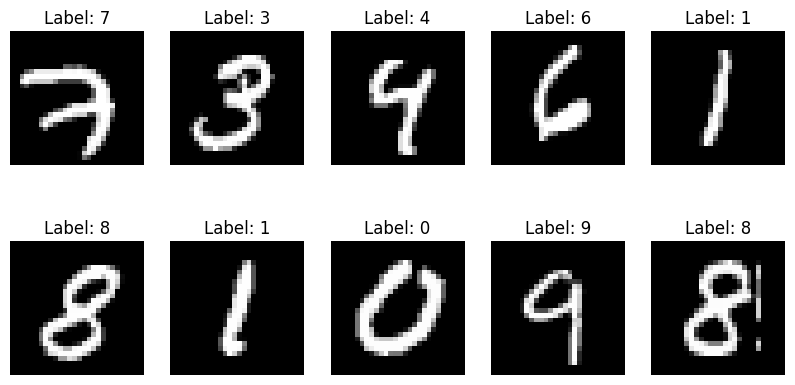

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.show()

In [36]:
import numpy as np

class my_PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        self.mean = np.mean(X_flat, axis=0)
        X_centered = X_flat - self.mean

        cov_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, idx]
        eigenvalues = eigenvalues[idx]

        self.components = eigenvectors[:, :self.n_components]
        self.explained_variance = eigenvalues[:self.n_components]

    def transform(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        X_centered = X_flat - self.mean
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def inverse_transform(self, X):
      return np.dot(X, self.components.T) + self.mean

    @property
    def explained_variance_ratio_(self):
        return self.explained_variance / np.sum(self.explained_variance)


In [29]:
class my_kNN():
    def __init__(self, n_neighbors=5, dot=None, answers=None):
      self.ne = n_neighbors
      self.dot = dot
      self.answers = answers

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
      r = []
      for x in X:
        x = np.reshape(x, (-1, 784)).astype(np.float32)
        distances = np.sqrt(np.sum((self.dot - x) ** 2, axis=1))
        neigh = np.argpartition(distances, self.ne)[:self.ne]
        types = self.answers[neigh]
        r.append(np.bincount(types).argmax())
      return r

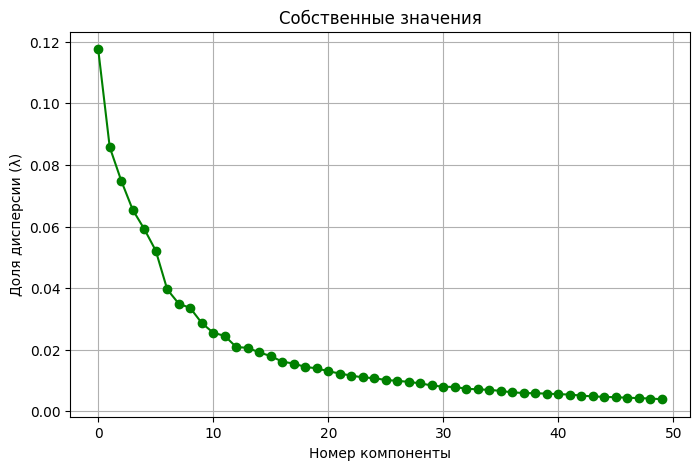

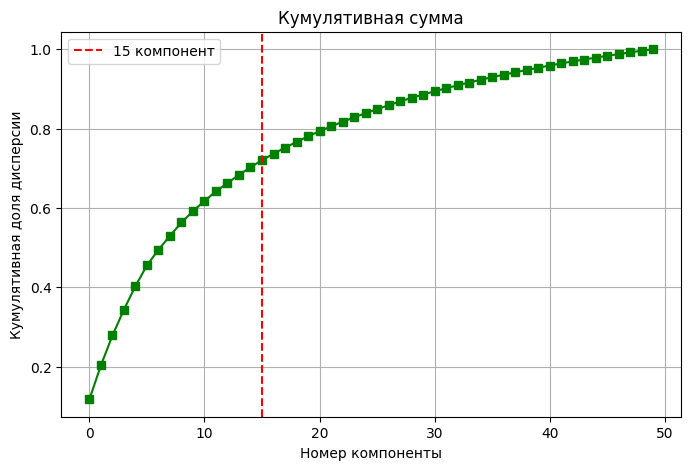

Доля дисперсии, покрытая первыми 15 компонентами: 0.7023481808934898


In [23]:
pca = my_PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)

ev_ratio = pca.explained_variance_ratio_
cum_var = np.cumsum(ev_ratio)

plt.figure(figsize=(8,5))
plt.plot(ev_ratio, marker='o', color="green")
plt.xlabel("Номер компоненты")
plt.ylabel("Доля дисперсии (λ)")
plt.title("Собственные значения")
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(cum_var, marker='s', color="green")
plt.axvline(15, color='r', linestyle='--', label="15 компонент")
plt.xlabel("Номер компоненты")
plt.ylabel("Кумулятивная доля дисперсии")
plt.title("Кумулятивная сумма")
plt.legend()
plt.grid()
plt.show()

print("Доля дисперсии, покрытая первыми 15 компонентами:", cum_var[14])

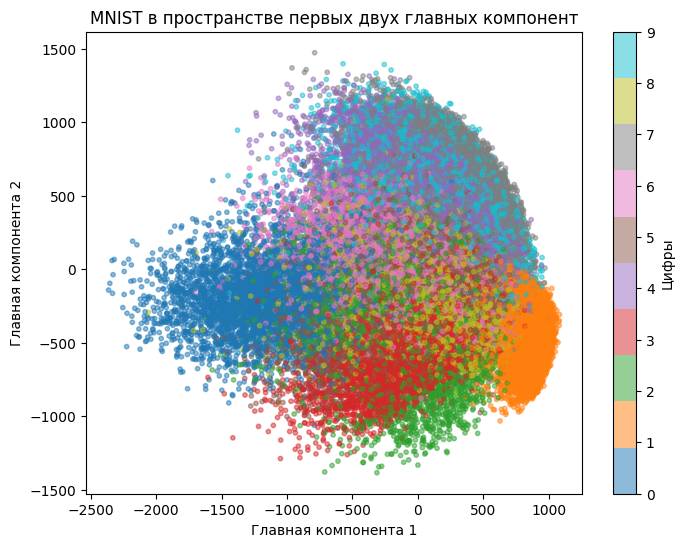

In [24]:
pca_2 = my_PCA(n_components=2)
X_train_2d = pca_2.fit_transform(X_train)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_train, cmap="tab10", alpha=0.5, s=10)
plt.colorbar(scatter, label="Цифры")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.title("MNIST в пространстве первых двух главных компонент")
plt.show()

In [25]:
X_small, _, y_small, _ = train_test_split(X_train, y_train, train_size=5000, random_state=42)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_small, y_small, test_size=1000, random_state=42)

knn = my_kNN(n_neighbors=5)
knn.fit(X_train_split, y_train_split)

y_pred = knn.predict(X_test_split)
print("Точность kNN без PCA:", accuracy_score(y_test_split, y_pred))


Точность kNN без PCA: 0.923
